# 周期性(季節性)のモデル化

ある期間で似たような変動を繰り返すデータを周期性をもつデータという。周期性にも確定的周期成分と確率的周期成分がある。

## 確定的周期成分

周期成分が確定的である場合を考える。確定的周期成分の場合は周期成分の和が0になるという仮定を置くことで、水準成分と周期成分を一意に決める。これは次のように表される。
$$
\sum_{i=1}^n \gamma_i = 0
$$

## 確率的周期成分

確率的周期成分では、周期成分の和がホワイトノイズに従うとすることで、周期成分が時点によって異なることをモデル化する。
$$
\sum_{i=1}^k\gamma_i = s_t \qquad s_t \sim Normal(0, \sigma_s^2)
$$
周期$k$をもつ時系列データの$t$時点における周期成分は次のようになる。
$$
\gamma_t = -\sum_{i=t-(k-1)}^{t-1}\gamma_i + s_t \qquad s_t \sim Normal(0, \sigma_s^2)
$$

## 基本構造時系列モデル

観測値を「トレンド成分+周期成分+ホワイトノイズ」の三つに分解するモデルを基本構造時系列モデルという。トレンド成分はローカルレベルモデルや平坦化ローカルモデルと同様の構造でモデル化される。

1次のトレンド(ローカルレベルモデル)に周期$k$の周期成分を含めたモデルは次のようになる。
$$
\mu_t \sim Normal(\mu_{t-1}, \sigma_w^2) \\
\gamma_t \sim Normal\Bigl(-\sum_{t-(k-1)}^{t-1}\gamma_i, \sigma_s^2\Bigr) \\
\alpha_t = \mu_t + \gamma_t \\
y_t \sim Normal(\alpha_t, \sigma_v^2)
$$

2次のトレンド(平坦化トレンドモデル)の場合は次のようになる。
$$
\mu_t \sim Normal(2\mu_{t-1}-\mu_{t-2}, \sigma_w^2) \\
\gamma_t \sim Normal\Bigl(-\sum_{t-(k-1)}^{t-1}\gamma_i, \sigma_s^2\Bigr) \\
\alpha_t = \mu_t + \gamma_t \\
y_t \sim Normal(\alpha_t, \sigma_v^2)
$$

## 基本構造時系列モデルのpystanでの実装

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

import stan
import nest_asyncio
nest_asyncio.apply()

In [2]:
sales = pd.read_csv('../data/4-6-sales.csv')
sales['date'] = [datetime.strptime(i, "%Y-%m-%d") for i in sales["date"]]

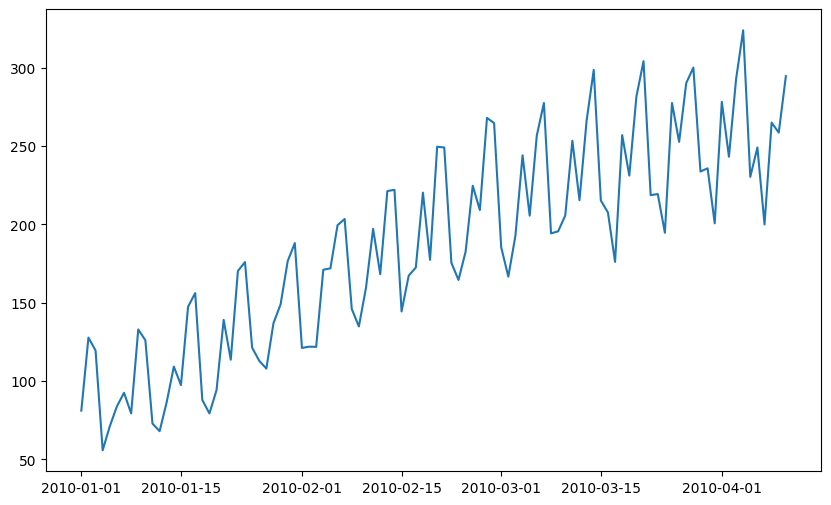

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.plot(sales['date'], sales['sales'])
plt.show()

1週間ごとの周期性と増加トレンドが徐々に減少していく様子が見られる

In [5]:
y = sales['sales'].values
T = len(y)

In [6]:
stan_data = {
    'T': T,
    'y': y
}

In [8]:
with open('../stan/4-6-basic-structual-time-series.stan') as f:
    stan_code = f.read()

In [9]:
sm = stan.build(stan_code, data=stan_data, random_seed=123)

Building...

In file included from /usr/local/lib/python3.11/site-packages/httpstan/include/Eigen/Core:215,
                 from /usr/local/lib/python3.11/site-packages/httpstan/include/Eigen/Dense:1,
                 from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/Eigen.hpp:22,
                 from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:4,
                 from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19,
                 from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /root/.cache/httpstan/4.12.0/models/53xiq2gq/model_53xiq2gq.cpp:2:
/usr/local/lib/python3.11/site-packages/httpstan/include/Eigen/src/Core/arch/NEON/PacketMath.h: In function ‘Packet Eigen::internal::pload(const typename unpacket_traits<T>::type*) [with Packet = eigen_packet_wrapper<int, 2>; typename unpacket_traits<T>::type = signed char]’:
/usr/local/lib/python3.11/


Building: 24.3s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [10]:
fit = sm.sample(num_chains=3, num_samples=9000, num_warmup=1000, num_thin=3)

Sampling:   0%
Sampling:   0% (1/30000)
Sampling:   0% (2/30000)
Sampling:   0% (3/30000)
Sampling:   0% (102/30000)
Sampling:   1% (201/30000)
Sampling:   1% (300/30000)
Sampling:   1% (400/30000)
Sampling:   2% (500/30000)
Sampling:   2% (600/30000)
Sampling:   2% (700/30000)
Sampling:   3% (800/30000)
Sampling:   3% (900/30000)
Sampling:   3% (1000/30000)
Sampling:   4% (1100/30000)
Sampling:   4% (1200/30000)
Sampling:   4% (1300/30000)
Sampling:   5% (1400/30000)
Sampling:   5% (1500/30000)
Sampling:   5% (1600/30000)
Sampling:   6% (1700/30000)
Sampling:   6% (1800/30000)
Sampling:   6% (1900/30000)
Sampling:   7% (2000/30000)
Sampling:   7% (2100/30000)
Sampling:   7% (2200/30000)
Sampling:   8% (2300/30000)
Sampling:   8% (2400/30000)
Sampling:   8% (2500/30000)
Sampling:   9% (2600/30000)
Sampling:   9% (2700/30000)
Sampling:   9% (2801/30000)
Sampling:  10% (2902/30000)
Sampling:  10% (3003/30000)
Sampling:  10% (3102/30000)
Sampling:  11% (3201/30000)
Sampling:  11% (3301/30

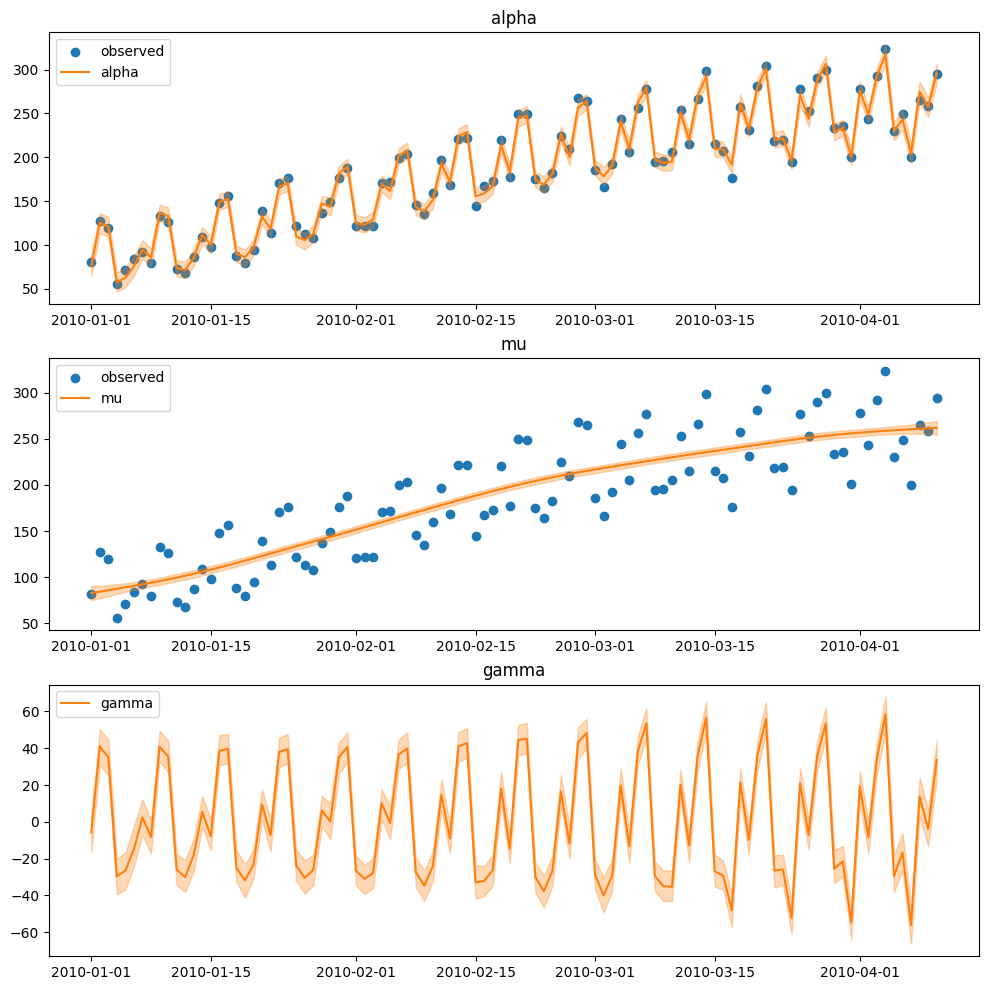

In [14]:
cmap = plt.get_cmap("tab10")

alpha_mean = az.summary(fit, var_names=["alpha"])["mean"].values
mu_mean = az.summary(fit, var_names=["mu"])["mean"].values
gamma_mean = az.summary(fit, var_names=["gamma"])["mean"].values


hdis = az.hdi(fit, var_names=["mu", "gamma", "alpha"], hdi_prob=0.95)
hdi_mu = hdis["mu"]
hdi_gamma = hdis["gamma"]
hdi_alpha = hdis["alpha"]

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
axes[0].scatter(sales["date"], sales["sales"], color=cmap(0), label="observed")
axes[1].scatter(sales["date"], sales["sales"], color=cmap(0), label="observed")

axes[0].plot(sales["date"], alpha_mean, color=cmap(1), label="alpha")
axes[1].plot(sales["date"], mu_mean, color=cmap(1), label="mu")
axes[2].plot(sales["date"], gamma_mean, color=cmap(1), label="gamma")

axes[0].fill_between(sales["date"], hdi_alpha[:, 0], hdi_alpha[:, 1], color=cmap(1), alpha=0.3)
axes[1].fill_between(sales["date"], hdi_mu[:, 0], hdi_mu[:, 1], color=cmap(1), alpha=0.3)
axes[2].fill_between(sales["date"], hdi_gamma[:, 0], hdi_gamma[:, 1], color=cmap(1), alpha=0.3)

axes[0].set_title("alpha")
axes[1].set_title("mu")
axes[2].set_title("gamma")

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.legend()
plt.show()